# ETA 2

Data & Model check

In [15]:
def comment_df_clean(url):
        nyt_key = ''
        nyt_secret_key = ''
#### Import packages
        import requests
        import numpy as np
        import pandas as pd
        import re
        from datetime import datetime
    
     
#### 1) Generate API urls
    
        base_url = 'https://api.nytimes.com/svc/community/v3/'
        offset = ['0', '25', '50', '75', '100']
    
    # url_list to store generated urls
        url_list = []
    
    # for loop to generate the urls
        for a in range(0, 5):
            comment_api = 'user-content/url.json?api-key=' + nyt_key + '&offset=' + offset[a] + '&url='
            article_url = url
            article_tmp1 = re.sub(':', '%3A', article_url)
            article_tmp2 = re.sub('/', '%2F', article_tmp1)
        
        
            final_url = base_url + comment_api + article_tmp2
            
            url_list.append(final_url)

#### 2) GET request to API, store JSON objects

    # json_list to store generated json objects    
        json_list = []
    
    # for loop to generate the json objects
        for a in range(0, 5):
            response = requests.get(url_list[a], params = {'sort' : 'reader'})
            json_obj = response.json()
        
            json_list.append(json_obj)
        
#### 3) Parse JSON objects
      
    # result list to store parsed json in csv format
        result = []
    
    # for loop to parse through json object
        for k in range(0, 5):
            for i in json_list[k]['results']['comments']:
                result.append(str(i['userDisplayName']) + ',' + str(i['userDisplayName']).split(' ')[0] +',' + re.sub(',',' ',str(i['commentBody'])) + ',' + str(i['createDate']) + ',' 
                              + str(i['approveDate']) + ',' + str(i['recommendations']) + ',' + str(i['replyCount']) +','
                              + str(i['editorsSelection']) + ',' + str(i['recommendedFlag']))  
                
    
    # save it in a pandas dataframe
        result_df = pd.DataFrame([cols.split(',') for cols in result],
                                  columns = ['userName', 'splitName', 'comment', 'createDate', 'approveDate', 'n_recommend', 'n_reply', 'nyt_select', 'recommendflag']
                                  )
        result_df['url'] = np.repeat(url, len(result_df))
        result_df['ttlCommentNum'] = np.repeat(json_list[0]['results']['totalCommentsFound'], len(result_df))
    
#### 4) cleant the dataframe, add gender and time
    
    # add the gender for name
        from nltk.corpus import names
        male_names = names.words('male.txt')
        female_names = names.words('female.txt')
    
        for v in range(0, len(result_df)):
        # Clean the name structure
            result_df['splitName'].iloc[v] = re.sub('[^A-z]','', result_df['splitName'].iloc[v])
            if result_df['splitName'].iloc[v] in male_names:
                result_df.loc[v, 'gender'] = 0
            elif result_df['splitName'].iloc[v] in female_names:
                result_df.loc[v, 'gender'] = 1
            else:
                result_df.loc[v, 'gender'] = 2
        
        
     # transform data types   
        result_df['n_recommend'] = result_df['n_recommend'].astype(int)
        result_df['n_reply'] = result_df['n_reply'].astype(int)
        result_df['createDate'] = result_df['createDate'].astype(int)
        result_df['approveDate'] = result_df['approveDate'].astype(int)
        result_df['splitName'] = result_df['splitName'].astype(str)
        result_df['comment'] = result_df['comment'].astype(str)
        result_df['gender'] = result_df['gender'].astype('category')
    
    
    # Add time
        result_df['time'] = np.repeat(None, len(result_df))

        for v in range(0, len(result_df)):
            result_df['time'].iloc[v] = datetime.fromtimestamp(result_df['approveDate'].iloc[v])
        
    # Add time_order index
        result_df = result_df.sort_values(by = 'time').reset_index(drop = True)
        result_df['time_order'] = np.arange(1, len(result_df)+1)
    
        result_df = result_df.drop(['createDate','approveDate'], axis = 1)
    
    # Return only ones with results
        if result_df.empty:
            return(print("empty"))
    
        else:
            return(result_df)

In [16]:
check = comment_df_clean(url = 'https://www.nytimes.com/2020/03/09/business/stock-market-today.html')

C:\Users\bolim\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
check.head()

,userName,splitName,comment,n_recommend,n_reply,nyt_select,recommendflag,url,ttlCommentNum,gender,time,time_order
0,AB,AB,This is when it hurts us not having a competen...,1046,7,False,0,https://www.nytimes.com/2020/03/09/business/st...,1496,2.0,2020-03-09 06:46:01,1
1,Mark,Mark,Our illustrious commander-in-chief was all too...,1183,17,False,0,https://www.nytimes.com/2020/03/09/business/st...,1496,0.0,2020-03-09 06:58:13,2
2,Nomind7,Nomind,This is when it hurts us not having universal ...,1046,33,False,0,https://www.nytimes.com/2020/03/09/business/st...,1496,2.0,2020-03-09 06:59:10,3
3,Michael,Michael,Oil prices falling is a symptom of demand fall...,136,4,False,0,https://www.nytimes.com/2020/03/09/business/st...,1496,0.0,2020-03-09 07:19:59,4
4,Larry,Larry,Virus at my daughters school in Boston. I have...,68,2,False,0,https://www.nytimes.com/2020/03/09/business/st...,1496,0.0,2020-03-09 07:29:30,5


In [19]:
df1 = comment_df_clean('https://www.nytimes.com/2020/03/09/business/stock-market-today.html')

In [20]:
df2 = comment_df_clean('https://www.nytimes.com/2020/03/09/upshot/coronavirus-oil-prices-bond-yields-recession.html')

In [21]:
df3 = comment_df_clean('https://www.nytimes.com/2020/03/06/business/economy/jobs-report.html')

In [22]:
df4 = comment_df_clean('https://www.nytimes.com/2020/02/18/business/dealbook/michael-bloomberg-wall-street.html')

In [23]:
df5 = comment_df_clean('https://www.nytimes.com/2020/02/26/technology/personaltech/ubereats-doordash-postmates-grubhub-review.html')

In [24]:
df6 = comment_df_clean('https://www.nytimes.com/2020/03/05/business/boeing-david-calhoun.html')

In [32]:
df7 = comment_df_clean('https://www.nytimes.com/2020/03/03/business/coronavirus-business-travel.html')

C:\Users\bolim\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [33]:
df8 = comment_df_clean('https://www.nytimes.com/2020/03/23/technology/coronavirus-surveillance-tracking-privacy.html')

In [41]:
df9 = comment_df_clean('https://www.nytimes.com/2020/03/23/technology/coronavirus-facebook-amazon-youtube.html')

In [43]:
import pandas as pd

In [44]:
d = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], ignore_index = True)
d.to_csv('ETAdata2.csv', index=False)

# Visualizations
------------------------------------

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

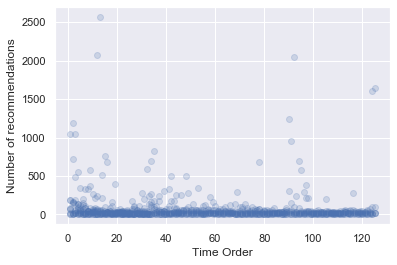

In [47]:
_ = plt.scatter(x = 'time_order', y = 'n_recommend', alpha = 0.2, data = d)
_ = plt.xlabel('Time Order')
_ = plt.ylabel('Number of recommendations')
plt.show()

In [37]:
import numpy as np

In [48]:
n_rec_array = np.asarray(d[['n_recommend']])

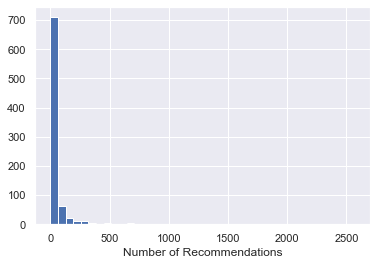

In [50]:
_ = plt.hist(n_rec_array, bins = 40)
_ = plt.xlabel('Number of Recommendations')
plt.show()

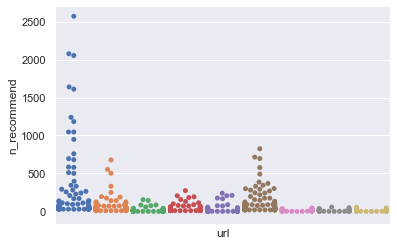

In [55]:
_ = sns.swarmplot(x = 'url', y = 'n_recommend', data = d)
_ = plt.xticks([])
plt.show()

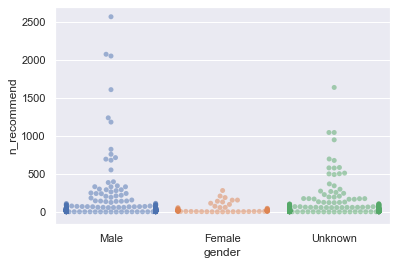

In [58]:
_ = sns.swarmplot(x = 'gender', y = 'n_recommend', alpha = 0.5, data = d)
_ = plt.xticks(np.arange(3), ('Male', 'Female', 'Unknown'))
plt.show()

In [65]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [66]:
men_nrec_array = np.asarray(d.loc[d['gender'] == 0]['n_recommend'])
women_nrec_array = np.asarray(d.loc[d['gender'] == 1]['n_recommend'])
neut_nrec_array = np.asarray(d.loc[d['gender'] == 2]['n_recommend'])

In [67]:
x_men, y_men = ecdf(men_nrec_array)
x_women, y_women = ecdf(women_nrec_array)
x_neut, y_neut = ecdf(neut_nrec_array)

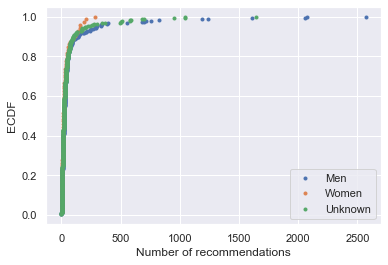

In [69]:
# Generate plot
_ = plt.plot(x_men, y_men, marker = '.', linestyle = 'none')
_ = plt.plot(x_women, y_women, marker = '.', linestyle = 'none')
_ = plt.plot(x_neut, y_neut, marker = '.', linestyle = 'none')

# Label the axes
_ = plt.xlabel('Number of recommendations')
_ = plt.ylabel('ECDF')

# legend
plt.legend(('Men', 'Women', 'Unknown'), loc='lower right')

# Display the plot
plt.show()
